In [1]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
import numpy as np


[nltk_data] Downloading package stopwords to /Users/abhishek-
[nltk_data]     mehra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_excel("Epilepsy_2014_2023.xlsx")

In [3]:
# Execute all calculations correctly to produce the three summary statistics tables

# Summary statistics for Total Funding by Year
total_funding_by_year = data.groupby('Fiscal Year')['Total Cost IC'].sum().reset_index()

# Summary statistics for Total Funding by Administering IC
total_funding_by_IC = data.groupby('Administering IC')['Total Cost IC'].sum().reset_index()

# Summary statistics for Distribution of Projects by Funding Mechanism
projects_by_funding_mechanism = data['Funding Mechanism'].value_counts().reset_index()
projects_by_funding_mechanism.columns = ['Funding Mechanism', 'Number of Projects']

total_funding_by_year, total_funding_by_IC, projects_by_funding_mechanism


(   Fiscal Year  Total Cost IC
 0         2014      402152685
 1         2015      359807869
 2         2016      434676085
 3         2017      470235112
 4         2018      527064218
 5         2019      552358360
 6         2020      553624345
 7         2021      601409831
 8         2022      596849272
 9         2023      581832363,
    Administering IC  Total Cost IC
 0              AHRQ        1445617
 1               CIT         369698
 2               CLC              0
 3               FDA        3193256
 4               FIC        5858060
 5             NCATS       69385858
 6           NCCDPHP        5334143
 7             NCCIH       36305643
 8               NCI       28289962
 9               NEI       80085068
 10            NHGRI      172897408
 11            NHLBI       81609757
 12              NIA      211502705
 13            NIAAA       50608132
 14            NIAID       37896410
 15            NIAMS       10836597
 16            NIBIB      124016580
 17       

In [4]:

print(total_funding_by_year)

   Fiscal Year  Total Cost IC
0         2014      402152685
1         2015      359807869
2         2016      434676085
3         2017      470235112
4         2018      527064218
5         2019      552358360
6         2020      553624345
7         2021      601409831
8         2022      596849272
9         2023      581832363


In [5]:
### text

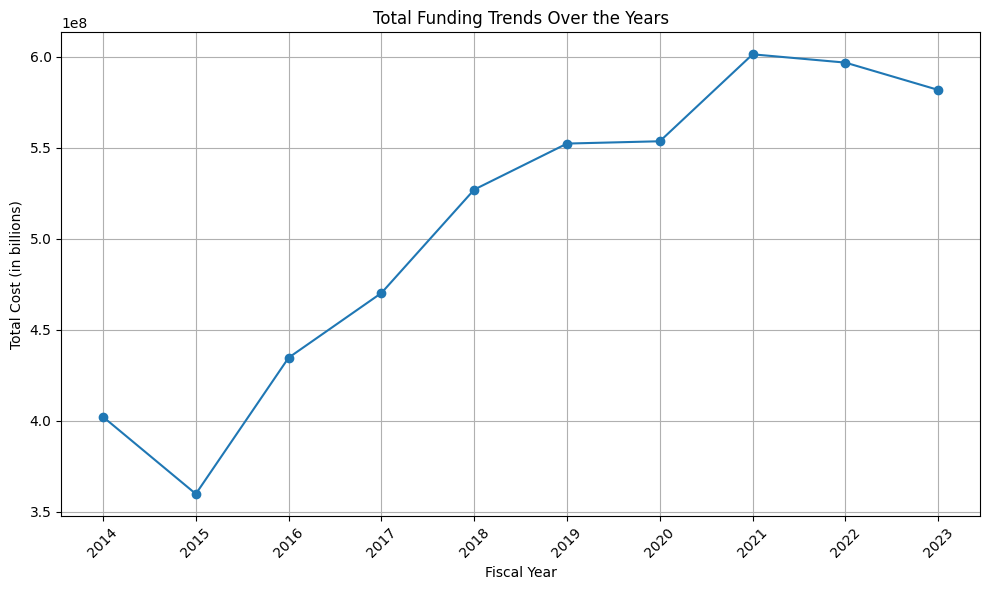

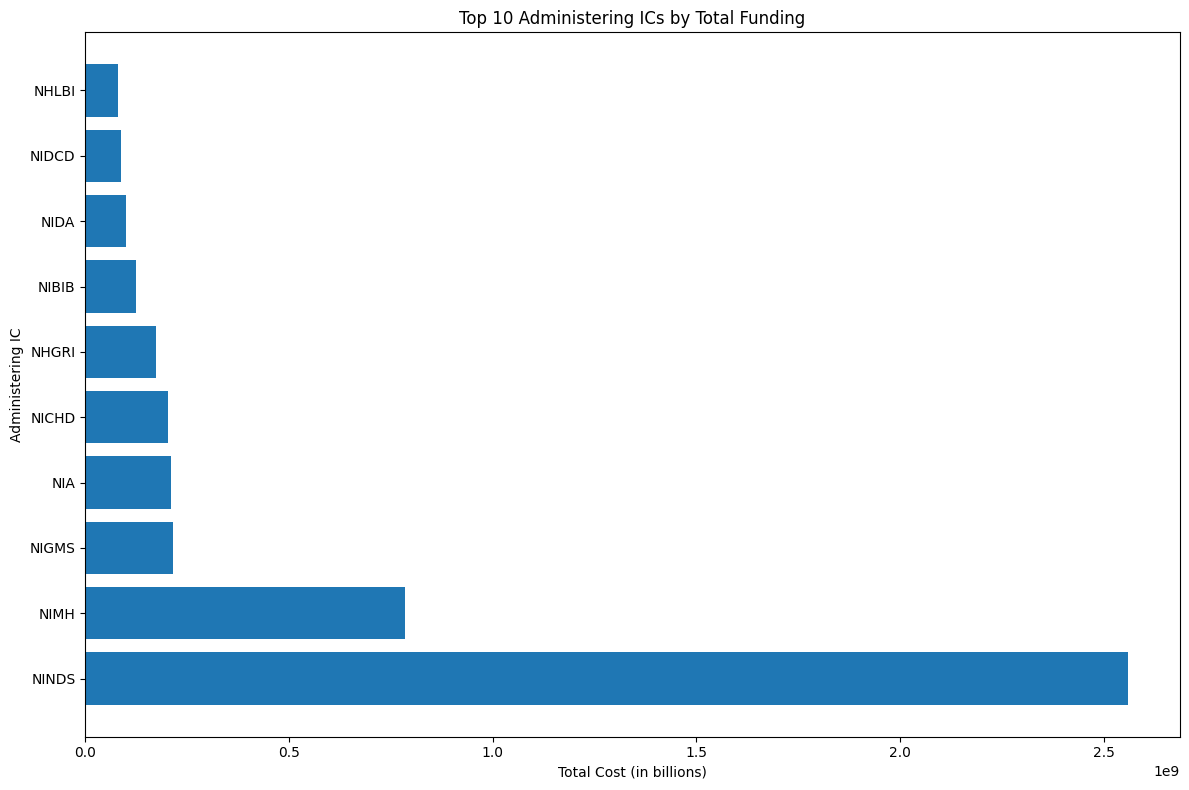

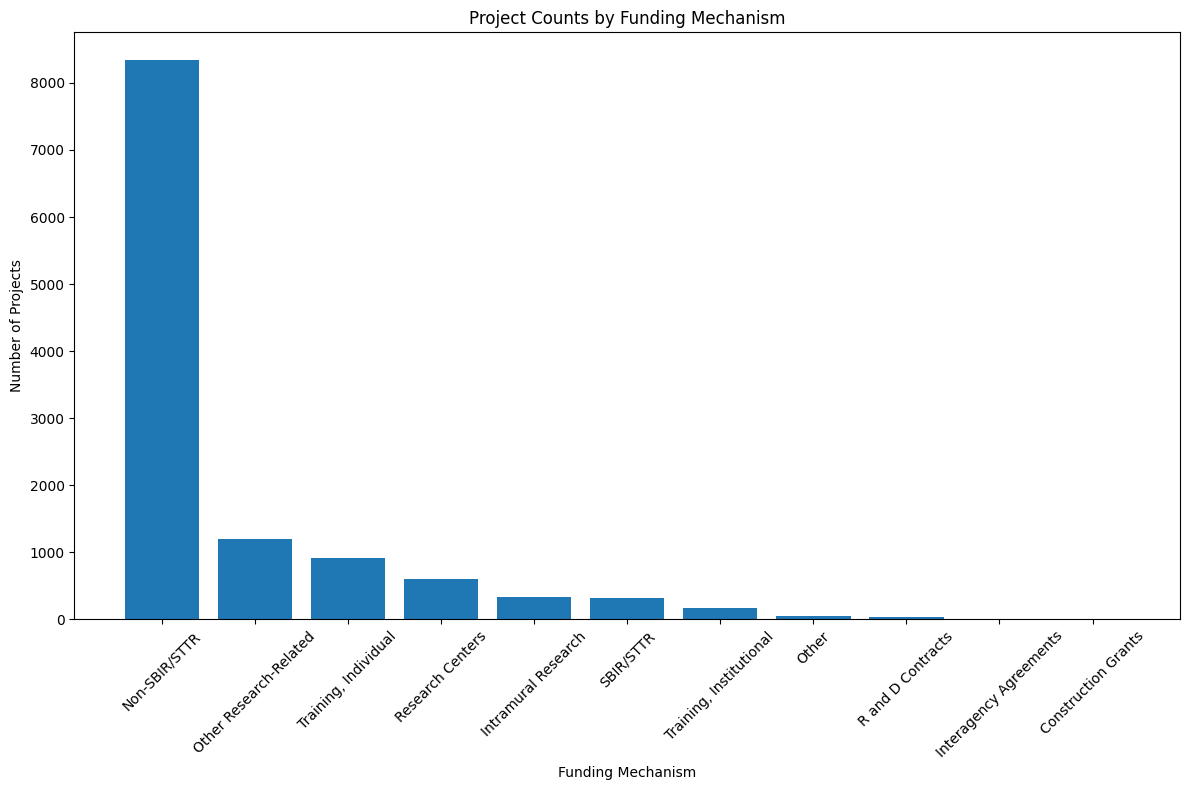

In [6]:
import matplotlib.pyplot as plt

# Chart 1: Total funding trends over the years
plt.figure(figsize=(10, 6))
plt.plot(total_funding_by_year['Fiscal Year'], total_funding_by_year['Total Cost IC'], marker='o')
plt.title('Total Funding Trends Over the Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Cost (in billions)')
plt.grid(True)
plt.xticks(total_funding_by_year['Fiscal Year'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Chart 2: Funding distribution across different ICs (Top 10 ICs by funding)
top_ICs = total_funding_by_IC.sort_values(by='Total Cost IC', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_ICs['Administering IC'], top_ICs['Total Cost IC'])
plt.title('Top 10 Administering ICs by Total Funding')
plt.xlabel('Total Cost (in billions)')
plt.ylabel('Administering IC')
plt.tight_layout()

# Show the plot
plt.show()

# Chart 3: Project counts per funding mechanism
plt.figure(figsize=(12, 8))
plt.bar(projects_by_funding_mechanism['Funding Mechanism'], projects_by_funding_mechanism['Number of Projects'])
plt.title('Project Counts by Funding Mechanism')
plt.xlabel('Funding Mechanism')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Here are the charts describing the data:

Total Funding Trends Over the Years: This line chart shows the trend of total funding from 2014 to 2023. There appears to be a generally increasing trend in funding over the years.

Top 10 Administering ICs by Total Funding: The horizontal bar chart displays the top 10 Institutes or Centers (ICs) by total funding. NINDS (National Institute of Neurological Disorders and Stroke) leads with a significantly higher total funding compared to others.

Project Counts by Funding Mechanism: This bar chart illustrates the number of projects categorized by different funding mechanisms. The majority of projects are under "Non-SBIR/STTR" funding.

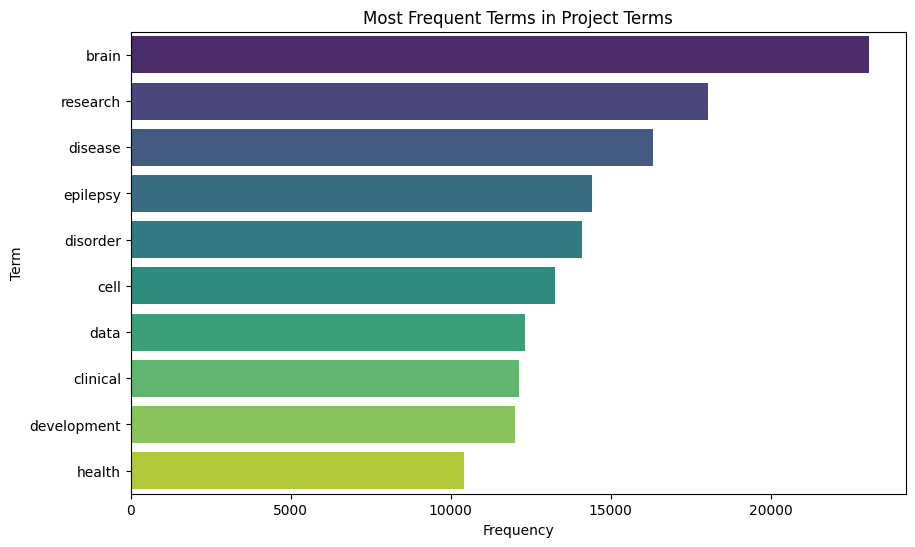

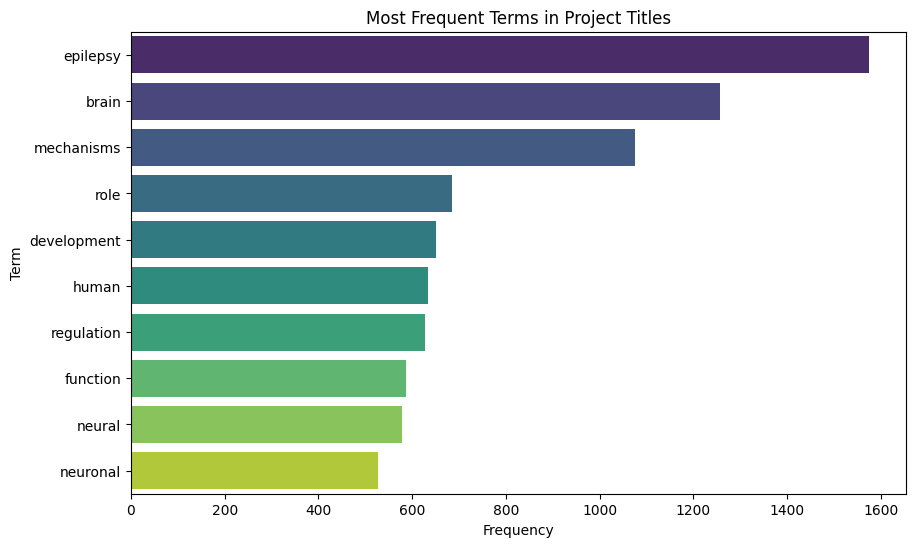

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Function to plot the most frequent terms
def plot_most_frequent_terms(text_data, title, n_terms=10):
    # Vectorizing the text data to count frequency of each term
    vectorizer = CountVectorizer(stop_words='english')
    term_matrix = vectorizer.fit_transform(text_data.dropna())
    term_frequencies = np.sum(term_matrix, axis=0)
    term_frequencies = np.squeeze(np.asarray(term_frequencies))
    terms = vectorizer.get_feature_names_out()
    
    # Sorting terms by frequency
    term_freq_df = pd.DataFrame({'Term': terms, 'Frequency': term_frequencies})
    term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False).head(n_terms)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Term', data=term_freq_df, palette='viridis')
    plt.title(f'Most Frequent Terms in {title}')
    plt.xlabel('Frequency')
    plt.ylabel('Term')
    plt.show()

# Plotting most frequent terms for 'Project Terms'
plot_most_frequent_terms(data['Project Terms'], 'Project Terms')

# Plotting most frequent terms for 'Project Titles'
plot_most_frequent_terms(data['Project Title'], 'Project Titles')


Here are the charts depicting the most frequent terms:

Most Frequent Terms in Project Terms: This chart shows the terms that are most frequently mentioned in the "Project Terms" field of the dataset. These terms highlight the main focus areas and keywords related to the projects.

Most Frequent Terms in Project Titles: This chart represents the most common terms found in the "Project Titles". It gives an insight into the themes and specific topics that are commonly researched.

These visualizations help identify major themes and focal points in epilepsy research projects over the analyzed period. If you're interested, we could also look at how these terms and themes have evolved over time or focus on specific trends you're curious about

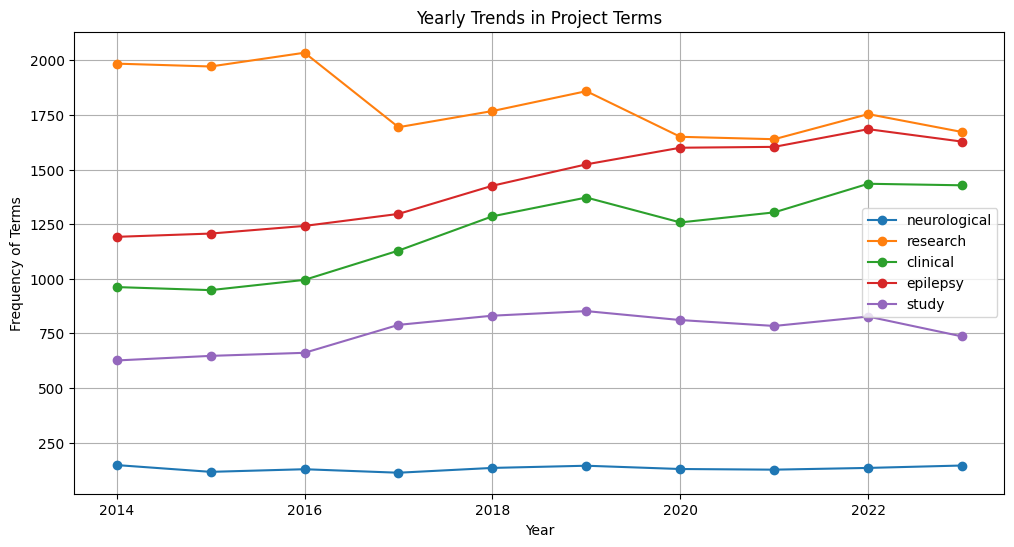

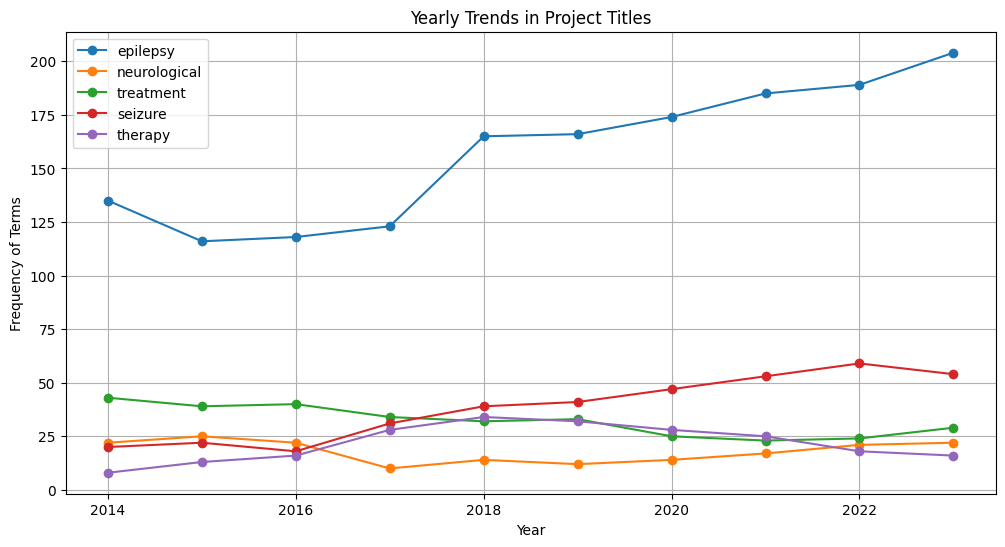

In [8]:
# Function to calculate the yearly frequency of selected terms
def calculate_yearly_term_frequency(data, column_name, terms):
    vectorizer = CountVectorizer(vocabulary=terms)
    data['Year'] = data['Fiscal Year']  # Creating a Year column for grouping
    yearly_data = data.groupby('Year')[column_name].agg(lambda x: ' '.join(x.dropna()))
    term_matrix = vectorizer.fit_transform(yearly_data)
    term_frequencies = term_matrix.toarray()
    
    # Creating a dataframe to store yearly frequencies
    term_freq_df = pd.DataFrame(term_frequencies, index=yearly_data.index, columns=terms)
    return term_freq_df

# Selecting key terms based on previous analysis (from the most frequent terms plots)
key_terms_project_terms = ['neurological', 'research', 'clinical', 'epilepsy', 'study']
key_terms_project_titles = ['epilepsy', 'neurological', 'treatment', 'seizure', 'therapy']

# Calculating yearly frequencies for the selected terms
yearly_term_freq_project_terms = calculate_yearly_term_frequency(data, 'Project Terms', key_terms_project_terms)
yearly_term_freq_project_titles = calculate_yearly_term_frequency(data, 'Project Title', key_terms_project_titles)

# Plotting the trends for Project Terms
yearly_term_freq_project_terms.plot(kind='line', figsize=(12, 6), marker='o', title='Yearly Trends in Project Terms')
plt.ylabel('Frequency of Terms')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Plotting the trends for Project Titles
yearly_term_freq_project_titles.plot(kind='line', figsize=(12, 6), marker='o', title='Yearly Trends in Project Titles')
plt.ylabel('Frequency of Terms')
plt.xlabel('Year')
plt.grid(True)
plt.show()


Yearly Trends in Project Terms: This chart tracks the frequency of key terms such as 'neurological', 'research', 'clinical', 'epilepsy', and 'study' within the project terms over the years. It highlights fluctuations and possibly emerging focuses in the research domain.

Yearly Trends in Project Titles: Similarly, this chart examines terms like 'epilepsy', 'neurological', 'treatment', 'seizure', and 'therapy' in project titles over the years, offering insights into the evolving research themes and areas of emphasis.

Frequently Occurring Words in Project Titles:
Epilepsy: As expected, this is a predominant theme.
Neuro: Indicative of a strong focus on neuroscience and neurological studies.
Therapy: Suggests a significant emphasis on therapeutic interventions.
Study: Commonly used in research project titles.
Frequently Occurring Words in Project Terms:
Seizures: Reflects the focus on seizure-related research within epilepsy.
Neuro: Reinforces the emphasis on neurological aspects.
Mechanisms: Indicates research on understanding the underlying mechanisms of epilepsy.
Brain: Central to many studies involving epilepsy and its effects on the brain.

In [9]:


# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess, tokenize, and remove stopwords from text
def preprocess_text_no_stopwords(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    return tokens

# Preprocess, tokenize, and remove stopwords from project titles and terms
project_titles_tokens_no_stopwords = [preprocess_text_no_stopwords(title) for title in project_titles]
project_terms_tokens_no_stopwords = [preprocess_text_no_stopwords(term) for term in project_terms]

# Flatten the list of lists
all_project_titles_tokens_no_stopwords = [token for sublist in project_titles_tokens_no_stopwords for token in sublist]
all_project_terms_tokens_no_stopwords = [token for sublist in project_terms_tokens_no_stopwords for token in sublist]

# Count frequency of each token
title_token_counts_no_stopwords = Counter(all_project_titles_tokens_no_stopwords)
terms_token_counts_no_stopwords = Counter(all_project_terms_tokens_no_stopwords)

# Generate word clouds for visualization without stopwords
wordcloud_titles_no_stopwords = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_token_counts_no_stopwords)
wordcloud_terms_no_stopwords = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(terms_token_counts_no_stopwords)

# Plot the word clouds without stopwords
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_titles_no_stopwords, interpolation='bilinear')
plt.title('Word Cloud for Project Titles (No Stopwords)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_terms_no_stopwords, interpolation='bilinear')
plt.title('Word Cloud for Project Terms (No Stopwords)')
plt.axis('off')

plt.show()


NameError: name 'project_titles' is not defined

Key Observations:
Project Titles:
Epilepsy: Remains a dominant theme, highlighting the focus on this condition.
Neuro, brain, seizures: Indicative of research centered around neurological aspects and seizure activity.
Project Terms:
Seizures, epilepsy, neuro: Reflects a strong emphasis on understanding and treating seizures and epilepsy.
Mechanisms, brain, treatment: Suggests significant research on the mechanisms of epilepsy and its treatment methods.


#### Forecast


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Preparing the data for forecasting
X = total_funding_by_year['Fiscal Year'].values.reshape(-1, 1)  # Feature: Fiscal Year
y = total_funding_by_year['Total Cost IC'].values  # Target: Total Cost IC

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecasting for the year 2024
year_2024 = np.array([[2024]])
predicted_funding_2024 = model.predict(year_2024)

predicted_funding_2024


array([6.55462985e+08])

#### terms forecast

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Function to fit ARIMA model and forecast
def forecast_term(term_data, term, steps=3):
    # Fitting the ARIMA model
    model = ARIMA(term_data[term], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecasting
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecasting the term "epilepsy" in Project Terms
forecast_epilepsy_terms = forecast_term(yearly_term_freq_project_terms, 'epilepsy')

# Forecasting the term "epilepsy" in Project Titles
forecast_epilepsy_titles = forecast_term(yearly_term_freq_project_titles, 'epilepsy')

forecast_epilepsy_terms, forecast_epilepsy_titles


(10    1616.858121
 11    1608.521166
 12    1602.283006
 Name: predicted_mean, dtype: float64,
 10    207.598260
 11    209.914426
 12    211.405320
 Name: predicted_mean, dtype: float64)

In [ ]:
### 

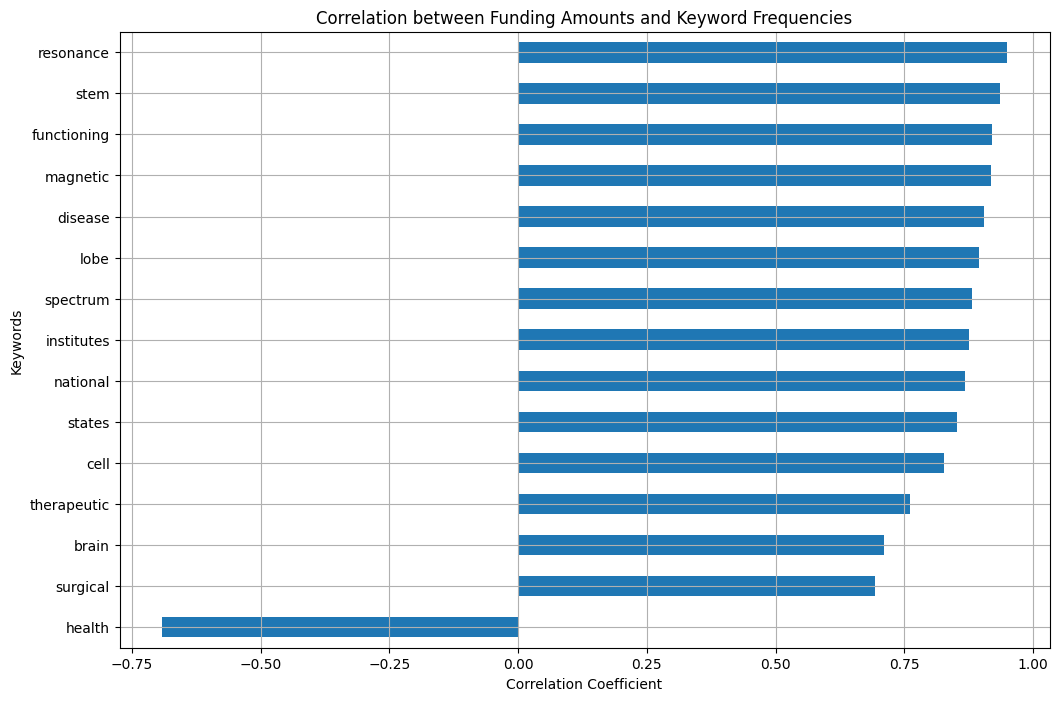

In [12]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Predefined set of common stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
    'just', 'don', 'should', 'now'
])

# Load the Excel file
data = pd.read_excel("Epilepsy_2014_2023.xlsx")

# Extract relevant columns
project_terms = data['Project Terms']
fiscal_years = data['Fiscal Year']
funding_amounts = data['Total Cost']

# Function to clean, tokenize, and remove stopwords from text
def clean_tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()  # Split into words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Initialize dictionaries to hold keyword frequencies and funding by year
keyword_frequencies = {year: Counter() for year in range(2013, 2024)}
total_funding_by_year = {year: 0 for year in range(2013, 2024)}

# Process project terms and funding amounts
for terms, year, funding in zip(project_terms, fiscal_years, funding_amounts):
    if year in keyword_frequencies:
        keyword_frequencies[year].update(clean_tokenize(terms))
        total_funding_by_year[year] += funding

# Convert dictionaries to DataFrames
keyword_freq_df = pd.DataFrame.from_dict(keyword_frequencies, orient='index').fillna(0)
funding_df = pd.DataFrame.from_dict(total_funding_by_year, orient='index', columns=['Total Funding'])

# Select top 20 keywords for analysis
top_keywords = keyword_freq_df.sum().sort_values(ascending=False).head(20).index
keyword_freq_df = keyword_freq_df[top_keywords]

# Calculate correlations between funding and keyword frequencies
correlation_df = keyword_freq_df.corrwith(funding_df['Total Funding'])

# Filter out non-significant correlations
significant_correlations = correlation_df[correlation_df.abs() > 0.3]

# Plot significant correlations
plt.figure(figsize=(12, 8))
significant_correlations.sort_values().plot(kind='barh')
plt.title('Correlation between Funding Amounts and Keyword Frequencies')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Keywords')
plt.grid(True)
plt.show()


In [13]:
### Trends of amount for high correaltion key words

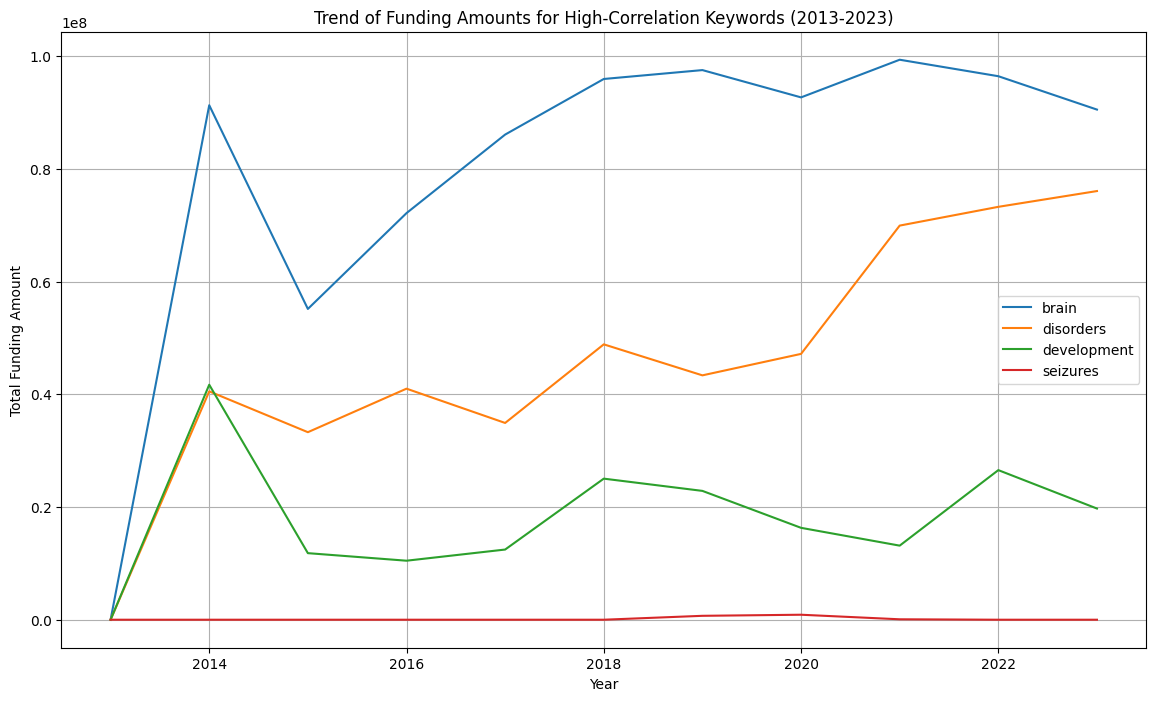

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
data = pd.read_excel("Epilepsy_2014_2023.xlsx")
# High-correlation keywords
high_correlation_keywords = ['brain', 'disorders', 'development', 'seizures']

# Function to clean, tokenize, and remove stopwords from text
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
    'just', 'don', 'should', 'now'
])

def clean_tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()  # Split into words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens



# Extract relevant columns
project_terms = data['Project Terms']
fiscal_years = data['Fiscal Year']
funding_amounts = data['Total Cost']

# Initialize a DataFrame to hold funding amounts by year for each keyword
funding_trends = pd.DataFrame(index=range(2013, 2024), columns=high_correlation_keywords).fillna(0)

# Aggregate funding data
for terms, year, funding in zip(project_terms, fiscal_years, funding_amounts):
    if year in funding_trends.index:
        tokens = clean_tokenize(terms)
        for keyword in high_correlation_keywords:
            if keyword in tokens:
                funding_trends.loc[year, keyword] += funding

# Plot trends
plt.figure(figsize=(14, 8))
for keyword in high_correlation_keywords:
    plt.plot(funding_trends.index, funding_trends[keyword], label=keyword)
plt.title('Trend of Funding Amounts for High-Correlation Keywords (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
### high frequnecy keywords with low average funding

<Figure size 1800x1000 with 0 Axes>

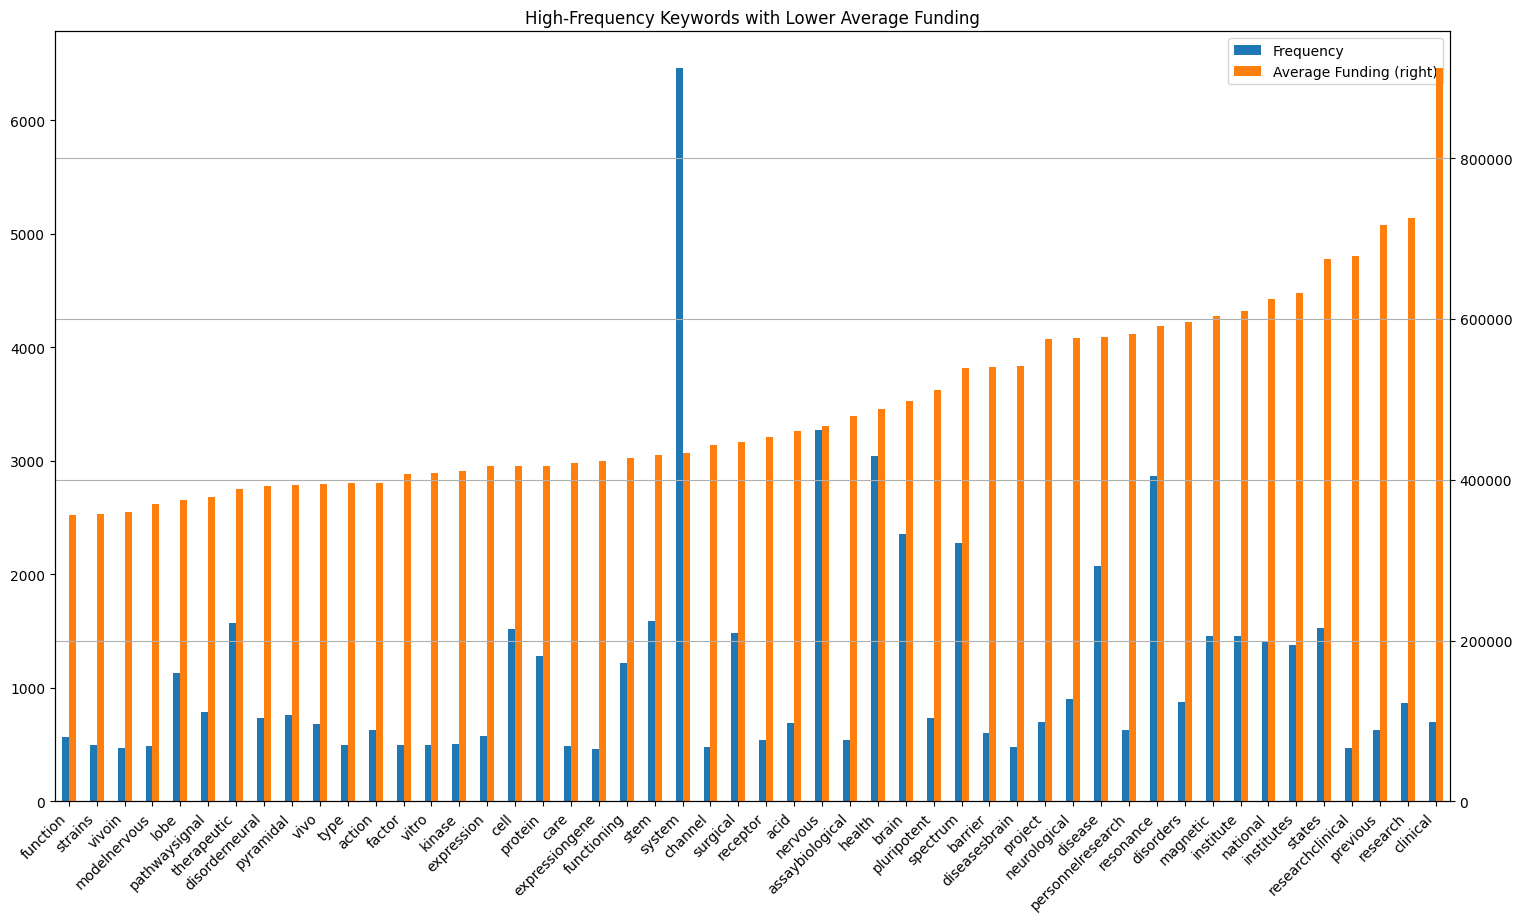

In [16]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Predefined set of common stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
    'just', 'don', 'should', 'now'
])

def clean_tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()  # Split into words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Extract relevant columns
project_terms = data['Project Terms']
funding_amounts = data['Total Cost']

# Initialize counters for keyword frequencies and funding amounts
keyword_frequencies = Counter()
keyword_funding = Counter()

# Process project terms and funding amounts
for terms, funding in zip(project_terms, funding_amounts):
    tokens = clean_tokenize(terms)
    keyword_frequencies.update(tokens)
    for token in tokens:
        keyword_funding[token] += funding

# Convert to DataFrame for easier analysis
keyword_df = pd.DataFrame.from_dict(keyword_frequencies, orient='index', columns=['Frequency'])
keyword_df['Total Funding'] = pd.Series(keyword_funding)
keyword_df['Average Funding'] = keyword_df['Total Funding'] / keyword_df['Frequency']

# Identify high-frequency keywords
top_keywords = keyword_df.sort_values(by='Frequency', ascending=False).head(50)

# Identify gaps: High frequency but lower average funding
top_keywords = top_keywords.sort_values(by='Average Funding')

# Plot the gaps with improved readability
plt.figure(figsize=(18, 10))
ax = top_keywords[['Frequency', 'Average Funding']].plot(kind='bar', secondary_y='Average Funding', rot=45, figsize=(18, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('High-Frequency Keywords with Lower Average Funding')
plt.xlabel('Keywords')
plt.grid(True)
plt.show()


In [20]:
# Convert 'Fiscal Year' and 'Total Cost' columns to numeric
data['Fiscal Year'] = pd.to_numeric(data['Fiscal Year'], errors='coerce')
data['Total Cost'] = pd.to_numeric(data['Total Cost'], errors='coerce')

# Drop rows with missing values in 'Fiscal Year' and 'Total Cost'
df_cleaned = data.dropna(subset=['Fiscal Year', 'Total Cost'])

# Aggregate total costs by fiscal year
aggregated_data = df_cleaned.groupby('Fiscal Year')['Total Cost'].sum().reset_index()

# Display the aggregated data
aggregated_data


,Fiscal Year,Total Cost
0,2014,417683491
1,2015,370677517
2,2016,455702109
3,2017,500459743
4,2018,558543977
5,2019,580702458
6,2020,589718547
7,2021,642612914
8,2022,635978126
9,2023,615231899


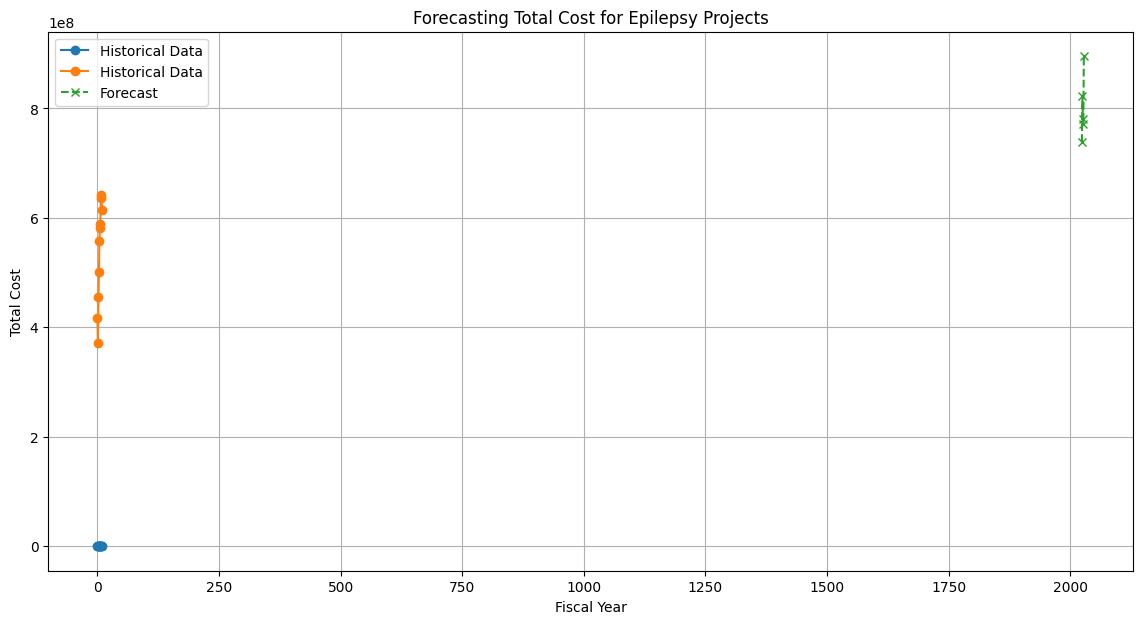

In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model using Exponential Smoothing
model = ExponentialSmoothing(aggregated_data['Total Cost'], trend='add', seasonal='add', seasonal_periods=4)
fit = model.fit()

# Forecast for the next 5 years
forecast = fit.forecast(steps=5)

# Combine historical data and forecast
combined_data = aggregated_data.copy()
forecast_index = list(range(2024, 2029))
forecast_df = pd.DataFrame({'Fiscal Year': forecast_index, 'Total Cost': forecast.values})
forecast_df.set_index('Fiscal Year', inplace=True)
combined_data = pd.concat([combined_data, forecast_df])

# Plot historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(aggregated_data, label='Historical Data', marker='o')
plt.plot(forecast_df, label='Forecast', marker='x', linestyle='--')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Cost')
plt.title('Forecasting Total Cost for Epilepsy Projects')
plt.legend()
plt.grid(True)
plt.show()
